### Specter generator

10


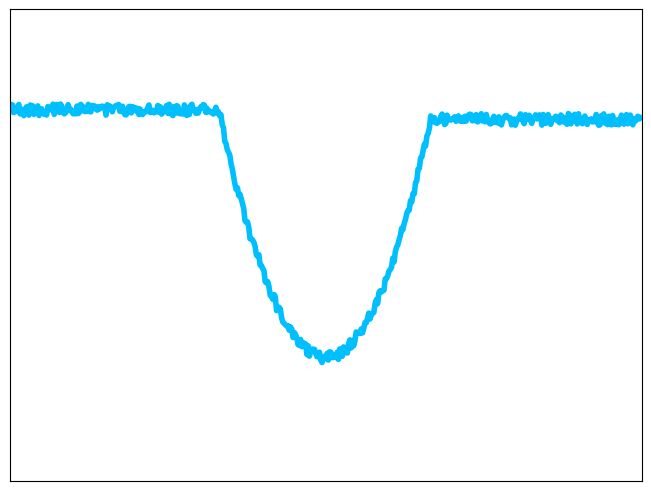

In [240]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.ticker as ticker

def specter_generator(_size_planet: int, _dt, _duration: int = 5, _exoplanet: bool= True)-> np.array:
    """Generates the specter of a planet given a size (1: 'small', 2:
    medium, 2: Big). If exoplanet = False, generates the specter of a star
    without exoplanets"""
    t = np.arange(0, _duration, _dt)
    a = len(t)//3
    b = 2*len(t)//3
    if(not _exoplanet):
        intensity = random.randint(7,13)
        return np.array([intensity + random.random() for _ in t]), t
    
    if(_size_planet == 1):
        decay = 1.5
    elif(_size_planet == 2):
        decay = 2
    elif(_size_planet == 3):
        decay = 2.5
    s1 = [random.random() + (decay*(t_0 - (duration)/2 ))**2 for t_0 in t]
    y_0 = s1[a]
    y_1 = s1[b]
    s1[:a] = [y_0 + random.random() for _ in t[:a]]
    s1[b:] = [y_1 + random.random() for _ in t[b:]]
    s1 = np.array(s1)
    return s1, t

duration = 10
print(duration)


y, t = specter_generator(3, 0.02, duration)
fig, (ax) = plt.subplots(1, 1, layout='constrained')
ax.plot(t, y + duration, color = '#00BFFF', linewidth = 4)
ax.set_xlim(0, duration)
ax.set_ylim(0, 40)
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())
plt.savefig("big_planet_3.png", bbox_inches="tight",
            pad_inches=0.3, transparent=True)

Generate White noise signals

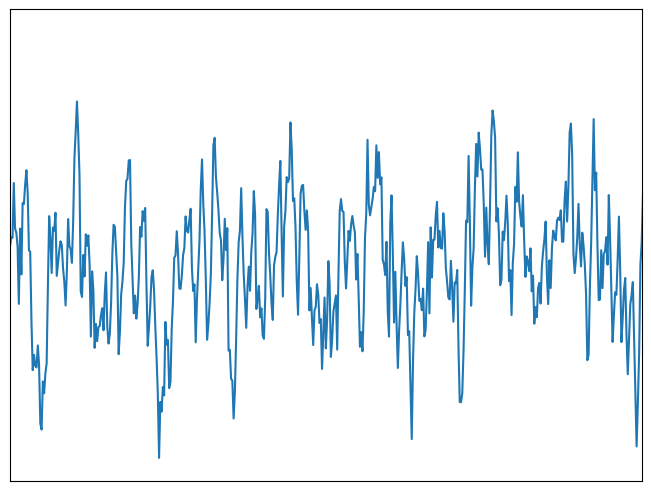

In [30]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax) = plt.subplots(1, 1, layout='constrained')

dt = 0.01
t = np.arange(0, 30, dt)

np.random.seed(8888)


nse1 = np.random.randn(len(t))             
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1

ax.plot(t, s1)
ax.set_xlim(0, 5)
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())
plt.savefig("noise_3.png", bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()